In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
a = Value(2.0)
b = Value(4.0)
a.exp()
a / 3

Value(data=0.6666666666666666, grad=0)

In [4]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label = "{ %s | data % .4f | grad %.4f}" % (n.label, n.data, n.grad, ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [5]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.88123415, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

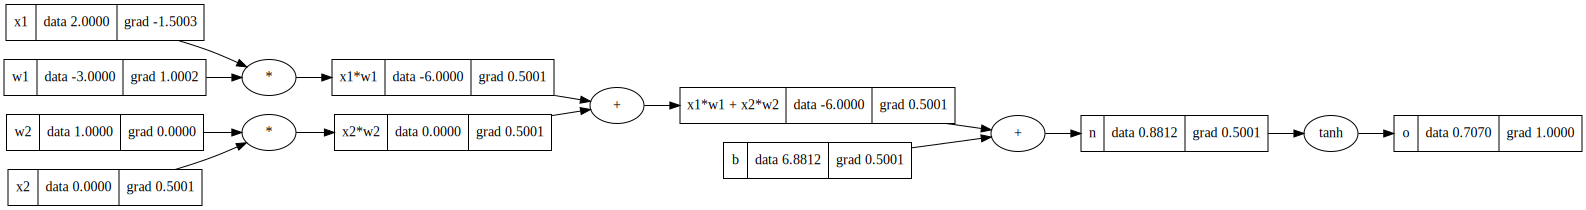

In [6]:
o.backward()
draw_dot(o)

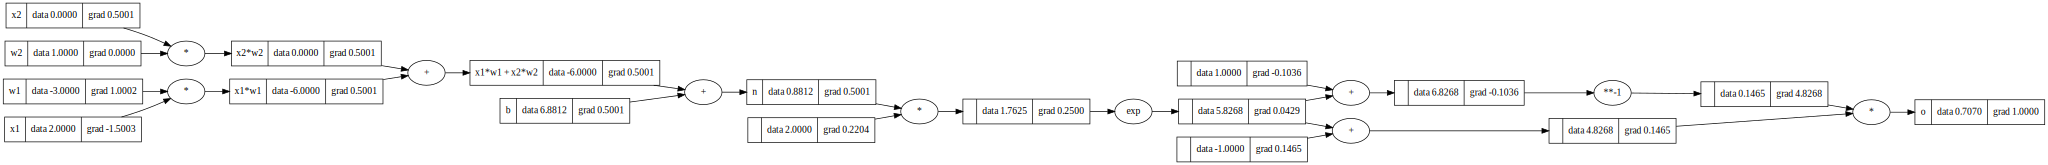

In [7]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.88123415, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e-1) / (e+1); o.label = 'o'

o.backward()
draw_dot(o)

In [8]:
import torch

x1 = torch.Tensor([2.0]).double()       ; x1.requires_grad = True
w1 = torch.Tensor([-3.0]).double()       ; w1.requires_grad = True
x2 = torch.Tensor([0.0]).double()       ; x2.requires_grad = True
w2 = torch.Tensor([1.0]).double()       ; w2.requires_grad = True
b = torch.Tensor([6.88137]).double()    ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x1', x1.grad.item())
print('w1', w1.grad.item())
print('x2', x2.grad.item())
print('w2', w2.grad.item())

0.7071050214706146
---
x1 -1.500007465833125
w1 1.0000049772220834
x2 0.5000024886110417
w2 0.0


In [9]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1], tanh=True)
# n = MLP(3, [4, 4, 1], tanh=False)
n(x)

Value(data=-0.36876275035695927, grad=0)

In [10]:
print(n)

MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]


In [11]:
# draw_dot(n(x))
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

In [12]:
n.train(xs, ys)
n.forward(xs)

0 4.5574047941138165
1 7.180950853160988
2 10.540285197460346
3 6.491005370942078
4 7.090124753231686
5 7.599589773374346
6 5.295852318414765
7 4.466506834629316
8 4.167942460466554
9 4.060459285767959
10 4.021765342876465
11 4.007835523435527
12 4.00282078843679
13 4.001015483837244
14 4.000365574181408
15 4.000131606705306
16 4.00004737841391
17 4.000017056229007
18 4.0000061402424425
19 4.000002210487279
20 4.000000795775421
21 4.0000002864791515
22 4.0000001031324945
23 4.000000037127697
24 4.000000013365971


[Value(data=3.468338818424315e-05, grad=0),
 Value(data=3.468338818424315e-05, grad=0),
 Value(data=3.468338818424315e-05, grad=0),
 Value(data=3.468338818424315e-05, grad=0)]